In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data1 = pd.read_csv('lianjia1.csv', encoding='gbk')
data2 = pd.read_csv('lianjia2.csv', encoding='gbk')
data3 = pd.read_csv('lianjia3.csv', encoding='utf-8')
data4 = pd.read_csv('lianjia4.csv', encoding='utf-8')
data5 = pd.read_csv('lianjia5.csv', encoding='utf-8')
data6 = pd.read_csv('lianjia6.csv', encoding='utf-8')
data7 = pd.read_csv('lianjia7.csv', encoding='utf-8')

In [36]:
data = pd.concat([data1, data2, data3, data4, data5,data6,data7])

In [37]:
len(data)

162227

In [38]:
data = data.dropna()

In [39]:
len(data)

144531

In [40]:
data.cjdanjia = np.round(data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x: x/10000), 2)

In [41]:
data.cjshijian = pd.to_datetime(data.cjshijian.map(lambda x :x[5:]))

In [42]:
data = data[data.cjxiaoqu.str.contains('远洋山水')]

In [43]:
data = data.sort_values(by='cjshijian')

In [44]:
data.set_index('cjshijian', inplace=True)

In [45]:
data = data['2012':]

In [30]:
#data.set_index('cjshijian',inplace=True)['2012':]

In [46]:
data = data[data.cjdanjia > 1]

In [47]:
data.head(3)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,congyenianxian,bankuai
cjshijian,,,,,,,,,,,,,
2012-01-07,32,远洋山水中街店,180.0,店经理,99% 122,2.54,远洋山水 1室1厅 70平,卢德强,28,房东信赖;销售达人;带看活跃;海外顾问,西/中楼层/26层,5年以上,鲁谷
2012-01-07,32,远洋山水中街店,180.0,店经理,99% 122,2.54,远洋山水 1室1厅 70平,卢德强,28,房东信赖;销售达人;带看活跃;海外顾问,西/中楼层/26层,5年以上,鲁谷
2012-02-13,42,远洋山水中街店,235.0,店经理,95% 134,2.22,远洋山水 2室2厅 105平,乔璐璐,72,房东信赖;销售达人,南/中楼层/24层,5年以上,鲁谷


In [48]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [49]:
data = data[['time', 'cjdanjia']]

In [50]:
data.head(5)

,time,cjdanjia
cjshijian,,
2012-01-07,6,2.54
2012-01-07,6,2.54
2012-02-13,43,2.22
2012-02-15,45,2.06
2012-02-19,49,2.23


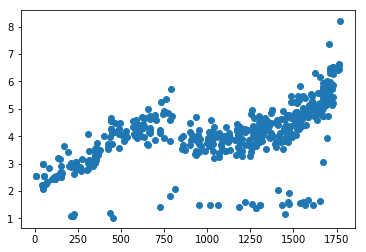

In [51]:
plt.scatter(data.time, data.cjdanjia)

In [52]:
X = data.time
Y = data.cjdanjia

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pd.DataFrame(X), Y)

In [54]:
model = LinearRegression() 
model.fit(pd.DataFrame(X), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

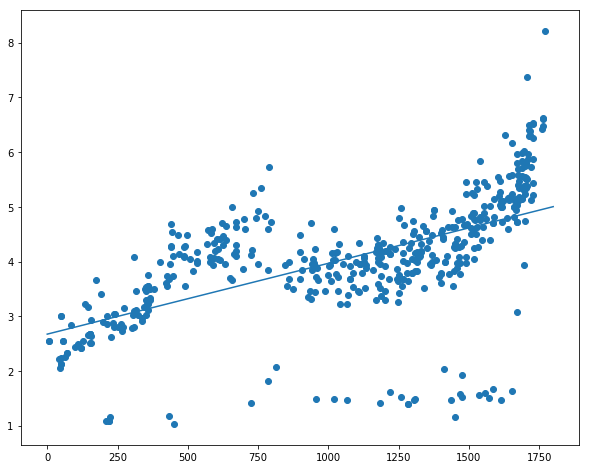

In [55]:
x = [[0], [1800]]
y = model.predict(pd.DataFrame(x))
plt.figure(figsize = (10, 8))
plt.plot(x, y)
plt.scatter(data.time, data.cjdanjia)

In [56]:
model2 = LinearRegression()
model2.fit(pd.DataFrame({'x2': X*X, 'x1':X}), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

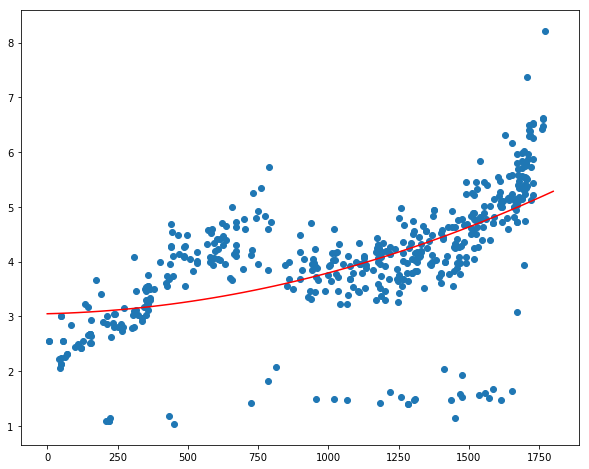

In [57]:
x = np.linspace(0, 1800)
y = model2.predict(pd.DataFrame({'x2': x*x, 'x1':x}))
plt.figure(figsize=(10,8))
plt.plot(x,y,color='r')
plt.scatter(data.time, data.cjdanjia)

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
q3 = PolynomialFeatures(degree=3)

In [60]:
X3 = q3.fit_transform(pd.DataFrame(X))

In [61]:
model3 = LinearRegression()
model3.fit(X3, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

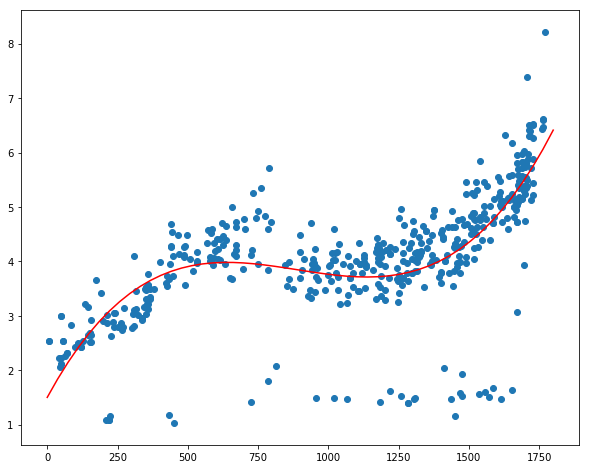

In [62]:
x = np.linspace(0, 1800)
x_ = q3.fit_transform(pd.DataFrame(x))
y = model3.predict(x_)
plt.figure(figsize=(10,8))
plt.plot(x,y,color='r')
plt.scatter(data.time, data.cjdanjia)